/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/trex.png


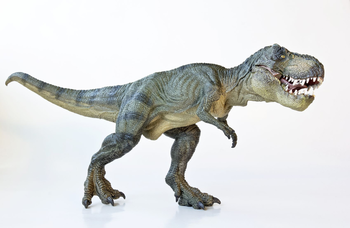

(228, 350, 3)

In [11]:
# USAGE
# python resize.py --image ../images/trex.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(f"{globals()['_dh'][0]}")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(f"{current_folder.parent}/images/trex.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


image.shape

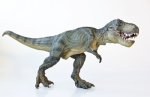

(97, 150, 3)

In [9]:
# We need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image. Let's make
# our new image have a width of 150 pixels
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# Perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


resized.shape

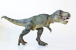

(50, 76, 3)

In [8]:
# What if we wanted to adjust the height of the image? We
# apply the same concept, again keeping in mind the aspect
# ratio, but instead calculating the ratio based on height.
# Let's make the height of the resized image 50 pixels
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# Perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


resized.shape

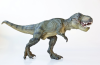

(65, 100, 3)

In [6]:
# Of course, calculating the ratio each and every time we
# want to resize an image is a real pain. Let's create a
# function where we can specify our target width or height,
# and have it take care of the rest for us.
resized = imutils.resize(image, width=100)
cv2.imshow("Resized via Function", resized)


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

resized.shape